# Communicate-Data-Findings-Ford-GoBike-System
## by Mohamed Abdelkader

## Investigation Overview

> Explore data and Understand how it correlate each other and bring best out of it ..

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area..

In [17]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [18]:
# load in the dataset into a pandas dataframe
df= pd.read_csv('201902-fordgobike-tripdata.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> most of bike users are around 30 and the more old age the less users ..


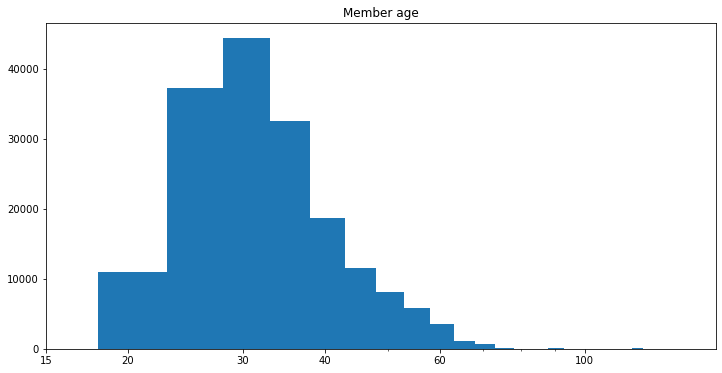

In [19]:
# Adding bins as in Univariant lesson class no 13 Scales and Transformations
# Adding ticks 
df['Age'] = 2019 - df.member_birth_year
bin_size = 5
bins = np.arange(df.Age.min(),df.Age.max() + bin_size, bin_size)
ticks = [15,20,30,40,60,100]
labels = ['{}'.format(v) for v in ticks]
plt.figure(figsize=(12,6))
plt.hist(df['Age'],bins = bins);
plt.title('Member age');
plt.xscale('log');
# as we see it became more normalized
plt.xticks(ticks, labels);
# now figure became much better visualizing 

## (Visualization 2)

> t's max used in Thursday and least at weekend (SAT AND SUN).

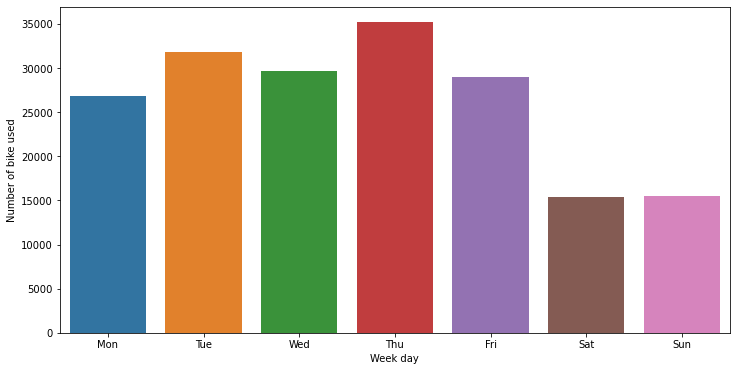

In [20]:
# seaborn.countplot Show the counts of observations in each categorical bin using bars
# Change data type start_time end_time from object to datetime.
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
# change duration_sec to duration in minutes to be like daily used data by people
df['duration_sec'] = df['duration_sec']/60
df.rename(columns= {"duration_sec":"duration_min"}, inplace = True ) 
df['start_month']=df['start_time'].dt.strftime('%B')
df['start_Weak_day']=df['start_time'].dt.strftime('%a')
df['start_hour']=df['start_time'].dt.hour
df['day_of_month']=df['start_time'].dt.strftime('%d')
daysofweak=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(12,6))
sb.countplot(data=df, x='start_Weak_day',order=daysofweak);
plt.xlabel('Week day');
plt.ylabel('Number of bike used');

## (Visualization 3)

> it's peak of using is at the early morning at 8 am where people foing to schools and work etc.. and at 5 pm while returing homes .. <br>
> And ofc rarely used at night and early morning and average using is in day time between 8 am and 5 pm.

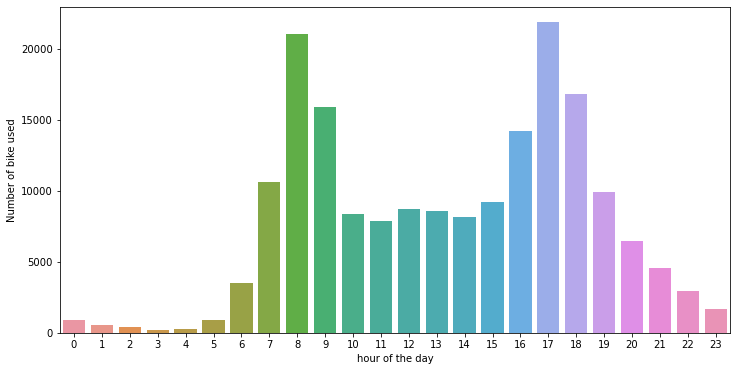

In [23]:
plt.figure(figsize=(12,6))
sb.countplot(data=df, x='start_hour');
plt.xlabel('hour of the day');
plt.ylabel('Number of bike used');

In [24]:
(Visualization 4)

SyntaxError: invalid syntax (<ipython-input-24-d8e9b742590b>, line 1)

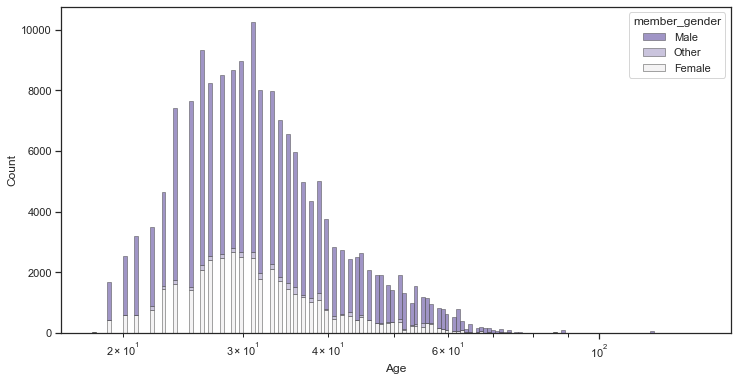

In [25]:
# as in this examble https://seaborn.pydata.org/examples/histogram_stacked.html
plt.figure(figsize=(12,6));
sb.set_theme(style="ticks")
sb.histplot(
    df,
    x="Age", hue="member_gender",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!